# About NYC Taxi

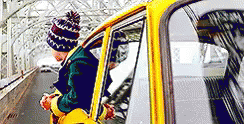

In New York City, taxicabs come in two varieties: yellow and green; they are widely recognizable symbols of the city. Taxis painted yellow (medallion taxis) are able to pick up passengers anywhere in the five boroughs. Those painted apple green (street hail livery vehicles, commonly known as "boro taxis"), which began to appear in August 2013, are allowed to pick up passengers in Upper Manhattan, the Bronx, Brooklyn, Queens (excluding LaGuardia Airport and John F. Kennedy International Airport), and Staten Island. Both types have the same fare structure. Taxicabs are operated by private companies and licensed by the New York City Taxi and Limousine Commission (TLC). It also oversees over 40,000 other for-hire vehicles, including "black cars", commuter vans, and ambulettes.

Taxicab vehicles, each of which must have a medallion to operate, are driven an average of 180 miles per shift. As of March 14, 2014, there were 51,398 individuals licensed to drive medallion taxicabs. There were 13,605 taxicab medallion licenses in existence. By July 2016, that number had dropped slightly to 13,587 medallions, or 18 lower than the 2014 total. Taxi patronage has declined since 2011 due to competition from ridesharing companies such as Uber.

# Importing the data

In [1]:
# importing required libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")

In [ ]:
df = pd.read_csv('taxi_tripdata.csv')
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   83691 non-null  object 
 2   lpep_dropoff_datetime  83691 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           83691 non-null  int64  
 6   DOLocationID           83691 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          83691 non-null  float64
 9   fare_amount            83691 non-null  float64
 10  extra                  83691 non-null  float64
 11  mta_tax                83691 non-null  float64
 12  tip_amount             83691 non-null  float64
 13  tolls_amount           83691 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [26]:
tf = pd.read_csv('Uber.csv')
tf.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [27]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Describe

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,51173.0,1.851113,0.355981,1.00,2.00,2.00,2.00,2.00
RatecodeID,51173.0,1.159244,0.773260,1.00,1.00,1.00,1.00,5.00
PULocationID,83691.0,108.362572,70.370170,3.00,56.00,75.00,166.00,265.00
DOLocationID,83691.0,133.270005,77.216791,1.00,69.00,132.00,205.00,265.00
passenger_count,51173.0,1.307858,0.984362,0.00,1.00,1.00,1.00,32.00
trip_distance,83691.0,194.354699,4405.549221,0.00,1.35,2.76,6.20,260517.93
fare_amount,83691.0,20.388305,15.583552,-150.00,9.00,16.00,26.83,480.00
extra,83691.0,1.156707,1.367897,-4.50,0.00,0.50,2.75,8.25
mta_tax,83691.0,0.293562,0.247773,-0.50,0.00,0.50,0.50,0.50
tip_amount,83691.0,1.058618,2.368771,-1.14,0.00,0.00,1.66,87.71


In [28]:
tf.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [5]:
df.isna().sum()/len(df)

VendorID                 0.388548
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       0.388548
RatecodeID               0.388548
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          0.388548
trip_distance            0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
ehail_fee                1.000000
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             0.388548
trip_type                0.388548
congestion_surcharge     0.388548
dtype: float64

In [29]:
tf.isna().sum()/len(df)

START_DATE    0.000000
END_DATE      0.000012
CATEGORY      0.000012
START         0.000012
STOP          0.000012
MILES         0.000000
PURPOSE       0.006010
dtype: float64

In [6]:
df.ehail_fee.unique()

array([nan])

In [7]:
df.drop('ehail_fee', axis=1, inplace=True)


In [8]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0


# Null values Treatmeant

In [31]:
for i in df.columns:
    df[i]=df[i].fillna(df[i].mode()[0])

for i in tf.columns:
    tf[i]=tf[i].fillna(tf[i].mode()[0])

In [10]:
df.isna().sum()/len(df)

VendorID                 0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
dtype: float64

In [32]:
tf.isna().sum()/len(df)

START_DATE    0.0
END_DATE      0.0
CATEGORY      0.0
START         0.0
STOP          0.0
MILES         0.0
PURPOSE       0.0
dtype: float64

In [11]:
df = df.drop(['lpep_pickup_datetime', 'lpep_dropoff_datetime'], axis=1)


In [12]:
df

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,N,1.0,74,168,1.0,1.20,6.00,0.50,0.5,0.00,0.00,0.3,7.30,2.0,1.0,0.0
1,2.0,N,1.0,116,265,2.0,13.69,42.00,0.50,0.5,0.00,0.00,0.3,43.30,2.0,1.0,0.0
2,2.0,N,1.0,97,33,1.0,0.95,6.50,0.50,0.5,2.34,0.00,0.3,10.14,1.0,1.0,0.0
3,2.0,N,1.0,74,42,1.0,1.24,6.50,0.50,0.5,0.00,0.00,0.3,7.80,2.0,1.0,0.0
4,2.0,N,1.0,42,244,1.0,1.10,7.00,0.50,0.5,0.00,0.00,0.3,8.30,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83686,2.0,N,1.0,218,169,1.0,18.04,50.24,2.75,0.0,0.00,6.55,0.3,59.84,1.0,1.0,0.0
83687,2.0,N,1.0,74,137,1.0,5.56,19.16,0.00,0.0,3.66,0.00,0.3,25.87,1.0,1.0,0.0
83688,2.0,N,1.0,69,75,1.0,5.13,22.45,0.00,0.0,0.00,0.00,0.3,22.75,1.0,1.0,0.0
83689,2.0,N,1.0,117,82,1.0,12.58,48.62,2.75,0.0,0.00,2.45,0.3,54.12,1.0,1.0,0.0


In [37]:
tf

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
df['store_and_fwd_flag'] = le.fit_transform(df['store_and_fwd_flag'])
df.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,0,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0
1,2.0,0,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0
2,2.0,0,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0
3,2.0,0,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0
4,2.0,0,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0


In [40]:
# List of columns to encode
categorical_columns = ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE']

# Apply LabelEncoder to each column
for col in categorical_columns:
    tf[col] = le.fit_transform(tf[col])

tf.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,0,0,0,52,49,46,6
1,1,1,0,52,49,45,7
2,2,2,0,52,49,43,5
3,3,3,0,52,49,42,7
4,4,4,0,52,181,232,4


<Axes: >

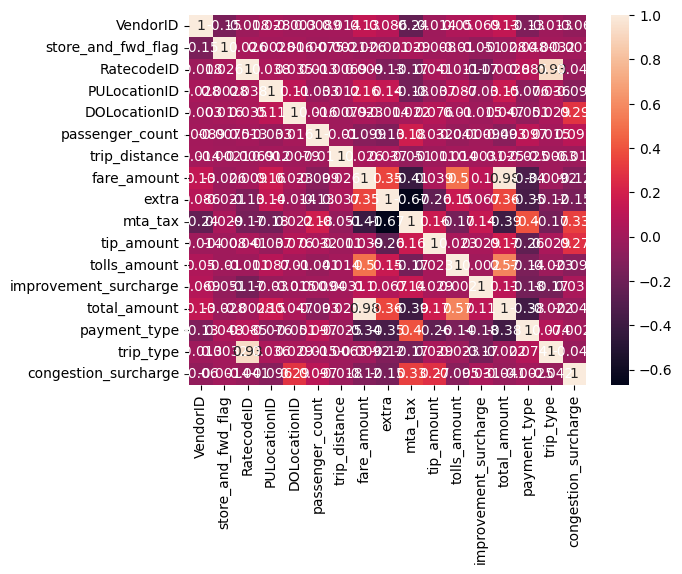

In [23]:
sns.heatmap(df.corr(), annot=True)     

<Axes: >

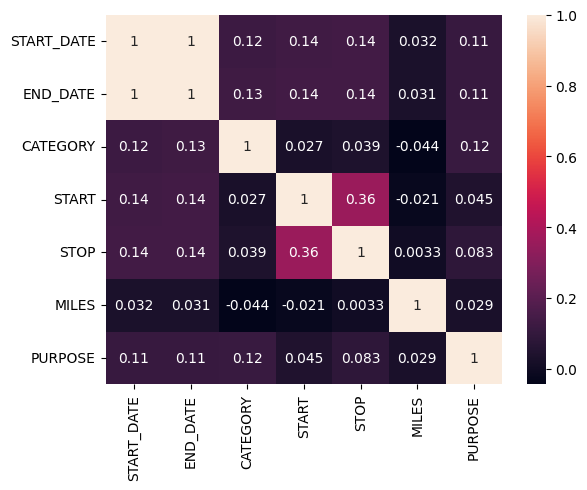

In [41]:
sns.heatmap(tf.corr(), annot=True) 

In [ ]:
df.tolls_amount.unique()

array([ 0.  ,  6.55, 13.1 ,  3.  ,  6.12,  2.45, 11.75,  9.55, 13.75,
        9.  , 18.3 ,  2.75, 20.3 , 27.5 , 23.5 ,  0.4 , 10.17, 30.05,
       26.85,  8.21,  2.29,  4.9 ,  2.8 ,  8.41, 19.65, 20.  ,  7.5 ,
       11.45, 17.87, 11.13, 12.  , 26.2 , 16.75])

In [17]:
x = df.drop('tolls_amount', axis=1)
y = df['tolls_amount']


In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

# ML algorithms

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import GammaRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

In [20]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rn = RandomForestRegressor()
knn = KNeighborsRegressor()
sgd = SGDRegressor()
br = BaggingRegressor()

# Modeling

In [21]:
li = [lr,knn,rn,dt,br]
di = {}
for i in li:
    i.fit(xtrain,ytrain)
    ypred = i.predict(xtest)
    print(i,":",r2_score(ypred,ytest)*100)
    di.update({str(i):i.score(xtest,ytest)*100})

LinearRegression() : 95.89501094211617
KNeighborsRegressor() : 28.322300534063537
RandomForestRegressor() : 93.93397561472706
DecisionTreeRegressor() : 88.70361125687538
BaggingRegressor() : 92.96773159924776


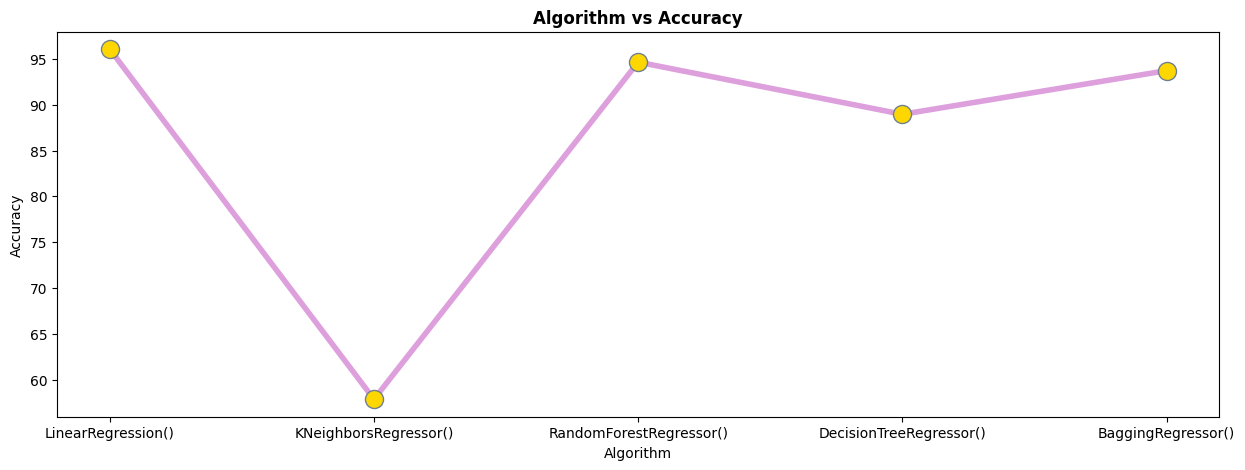

In [36]:
plt.figure(figsize=(15, 5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(di.keys(),di.values(),marker='o',color='plum',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='slategray')
plt.show()

<Axes: xlabel='passenger_count', ylabel='count'>

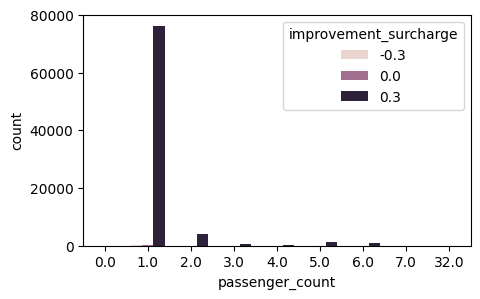

In [46]:
plt.figure(figsize=(5,3))
sns.countplot(x="passenger_count", data=df, hue='improvement_surcharge')

In [50]:
df

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,0,1.0,74,168,1.0,1.20,6.00,0.50,0.5,0.00,0.00,0.3,7.30,2.0,1.0,0.0
1,2.0,0,1.0,116,265,2.0,13.69,42.00,0.50,0.5,0.00,0.00,0.3,43.30,2.0,1.0,0.0
2,2.0,0,1.0,97,33,1.0,0.95,6.50,0.50,0.5,2.34,0.00,0.3,10.14,1.0,1.0,0.0
3,2.0,0,1.0,74,42,1.0,1.24,6.50,0.50,0.5,0.00,0.00,0.3,7.80,2.0,1.0,0.0
4,2.0,0,1.0,42,244,1.0,1.10,7.00,0.50,0.5,0.00,0.00,0.3,8.30,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83686,2.0,0,1.0,218,169,1.0,18.04,50.24,2.75,0.0,0.00,6.55,0.3,59.84,1.0,1.0,0.0
83687,2.0,0,1.0,74,137,1.0,5.56,19.16,0.00,0.0,3.66,0.00,0.3,25.87,1.0,1.0,0.0
83688,2.0,0,1.0,69,75,1.0,5.13,22.45,0.00,0.0,0.00,0.00,0.3,22.75,1.0,1.0,0.0
83689,2.0,0,1.0,117,82,1.0,12.58,48.62,2.75,0.0,0.00,2.45,0.3,54.12,1.0,1.0,0.0


Data Visulaization

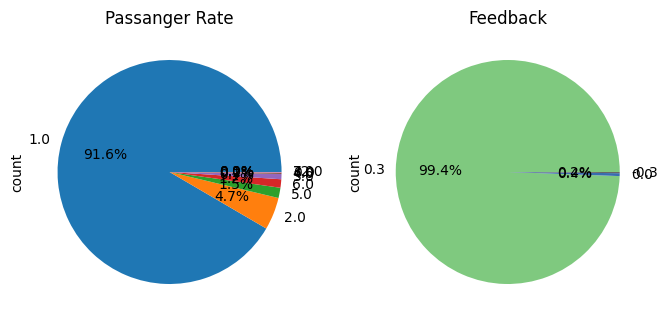

In [54]:
plt.figure(1, figsize=(8,8))
plt.subplot(221)
df["passenger_count"].value_counts().plot.pie(title='Passanger Rate',autopct="%1.1f%%")
plt.subplot(222)
df['improvement_surcharge'].value_counts().plot.pie(title='Feedback',cmap="Accent",autopct="%1.1f%%")
plt.show()

In [59]:
print("------Dataset 1---------")
print(df.isnull().sum().sort_values(ascending=False)[1:] / 83691* 100)
print("\n------Dataset 2---------")
print(tf.isnull().sum().sort_values(ascending=False)[1:] / 1156  * 100)

------Dataset 1---------
mta_tax                  0.0
trip_type                0.0
payment_type             0.0
total_amount             0.0
improvement_surcharge    0.0
tolls_amount             0.0
tip_amount               0.0
extra                    0.0
store_and_fwd_flag       0.0
fare_amount              0.0
trip_distance            0.0
passenger_count          0.0
DOLocationID             0.0
PULocationID             0.0
RatecodeID               0.0
congestion_surcharge     0.0
dtype: float64

------Dataset 2---------
END_DATE    0.0
CATEGORY    0.0
START       0.0
STOP        0.0
MILES       0.0
PURPOSE     0.0
dtype: float64


Segmantation

<Axes: xlabel='passenger_count', ylabel='count'>

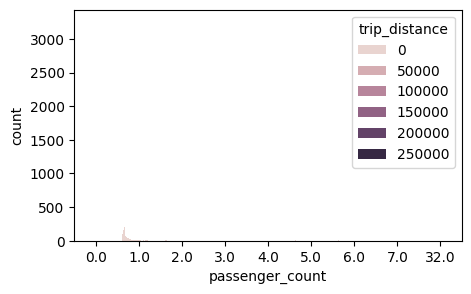

In [62]:
## Passenger wise Tip
plt.figure(figsize=(5,3))
sns.countplot(x="passenger_count", data=df, hue='trip_distance')

Geographic Analysis